In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px

from wordcloud import WordCloud
from math import pi


In [4]:
#pip install plotly==4.8.2

In [5]:
df = pd.read_csv(r'C:/Users/oshri/Desktop/FifaProject/cleanData.csv')
df.head()

Name                 Club       Nation  Age  Height  Weight  \
0       Lionel Messi         FC Barcelona    Argentina   31     170      72   
1  Cristiano Ronaldo      Piemonte Calcio     Portugal   33     187      83   
2             Neymar  Paris Saint-Germain       Brazil   26     175      68   
3    Virgil van Dijk            Liverpool  Netherlands   27     193      92   
4          Jan Oblak   Atlético de Madrid     Slovenia   25     187      87   

    Foot    Wage     Value Position  ...  Composure  Heading Acc.  \
0   Left  500000  95000000       RW  ...         96            70   
1  Right  320000  61000000       ST  ...         95            89   
2  Right  230000  95000000       LW  ...         94            62   
3  Right  175000  74000000       CB  ...         89            87   
4  Right   83000  66000000       GK  ...         68            15   

   Interceptions  Marking  Stand Tackle  Slide Tackle  Aggression  Jumping  \
0             40       33            37            26          48       68   
1             29       28            32            24          63       95   
2             36       35            30            29          51       61   
3             90       93            93            86          83       90   
4             19       27            12            18          34       78   

   Stamina  Strength  
0       75        68  
1       85        78  
2       81        49  
3       75        92  
4       41        78  

[5 rows x 41 columns]

# EDA OF Positions

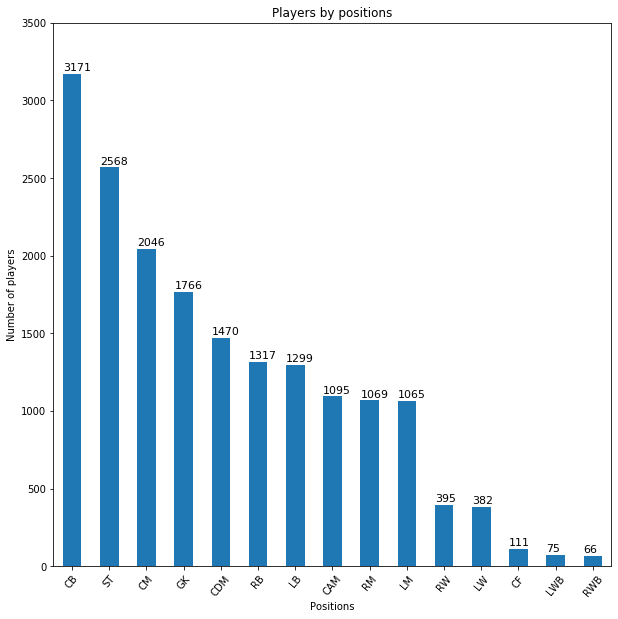

In [6]:
Position = df.groupby('Position').size().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,10))
ax=Position.plot.bar(rot=50)
plt.ylabel("Number of players")
plt.xlabel("Positions")
plt.title("Players by positions")
ax.set_ylim(0,3500)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+20, str(i.get_height()),fontsize=11)

In [7]:
df.iloc[df.groupby(df['Position'])['Rating'].idxmax()][['Name','Position', 'Club', 'Nation', 'Age', 'Rating']]

Name Position                 Club          Nation  \
5           Kevin De Bruyne      CAM      Manchester City         Belgium   
3           Virgil van Dijk       CB            Liverpool     Netherlands   
14             N'Golo Kante      CDM              Chelsea          France   
16        Antoine Griezmann       CF         FC Barcelona          France   
17               Toni Kroos       CM          Real Madrid         Germany   
4                 Jan Oblak       GK   Atlético de Madrid        Slovenia   
60         Andrew Robertson       LB            Liverpool        Scotland   
39            Heung Min Son       LM    Tottenham Hotspur  Korea Republic   
2                    Neymar       LW  Paris Saint-Germain          Brazil   
413            Adryan Zonta      LWB          Free player          Brazil   
83   Trent Alexander-Arnold       RB            Liverpool         England   
55             Jadon Sancho       RM    Borussia Dortmund         England   
0              Lionel Messi       RW         FC Barcelona       Argentina   
286         Mario Fernandes      RWB          CSKA Moskva          Russia   
1         Cristiano Ronaldo       ST      Piemonte Calcio        Portugal   

     Age  Rating  
5     27      91  
3     27      91  
14    27      89  
16    27      89  
17    28      89  
4     25      91  
60    24      86  
39    26      87  
2     26      92  
413   26      80  
83    19      85  
55    18      86  
0     31      94  
286   27      82  
1     33      93

In [8]:
df.iloc[df.groupby(df['Position'])['Potential'].idxmax()][['Name','Position', 'Club', 'Nation', 'Age','Potential', 'Rating']]

Name Position                     Club       Nation  \
115              Kai Havertz      CAM      Bayer 04 Leverkusen      Germany   
3            Virgil van Dijk       CB                Liverpool  Netherlands   
1261           Sandro Tonali      CDM                  Brescia        Italy   
419      Joao Felix Sequeira       CF       Atlético de Madrid     Portugal   
57           Frenkie de Jong       CM             FC Barcelona  Netherlands   
4                  Jan Oblak       GK       Atlético de Madrid     Slovenia   
60          Andrew Robertson       LB                Liverpool     Scotland   
116          Marcus Rashford       LM        Manchester United      England   
2                     Neymar       LW      Paris Saint-Germain       Brazil   
3801           Ruben Vinagre      LWB  Wolverhampton Wanderers     Portugal   
83    Trent Alexander-Arnold       RB                Liverpool      England   
55              Jadon Sancho       RM        Borussia Dortmund      England   
0               Lionel Messi       RW             FC Barcelona    Argentina   
1684  Ainsley Maitland-Niles      RWB                  Arsenal      England   
13             Kylian Mbappe       ST      Paris Saint-Germain       France   

      Age  Potential  Rating  
115    19         93      84  
3      27         92      91  
1261   18         91      77  
419    18         93      80  
57     21         92      86  
4      25         93      91  
60     24         89      86  
116    20         89      84  
2      26         92      92  
3801   19         83      72  
83     19         90      85  
55     18         94      86  
0      31         94      94  
1684   21         83      75  
13     19         95      89

In [9]:
df_2=df[df['Club'] == 'Free player']
df.iloc[df_2.groupby(df['Position'])['Rating'].idxmax()][['Name','Position', 'Club', 'Nation', 'Age', 'Rating']]

Name Position         Club     Nation  Age  \
225                 Nuno Padrenda      CAM  Free player     Brazil   22   
159   Josue Durval Chiamulera Vaz       CB  Free player     Brazil   26   
233              Rosberto Dourado      CDM  Free player     Brazil   18   
7438                Yohan Croizet       CF  Free player     France   26   
694                       Granero       CM  Free player      Spain   31   
235              Raphaelito Anjos       GK  Free player     Brazil   30   
245                  Marcos Acuna       LB  Free player  Argentina   26   
1170                   Muo Cadete       LM  Free player     Brazil   18   
381           Stephan El Shaarawy       LW  Free player      Italy   25   
413                  Adryan Zonta      LWB  Free player     Brazil   26   
288                  Jesus Corona       RB  Free player     Mexico   25   
97                          Pizzi       RM  Free player   Portugal   28   
158               Ronaldo Cabrais       RW  Free player     Brazil   26   
9886                    Ming Tian      RWB  Free player   China PR   23   
148               Mario Mandzukic       ST  Free player    Croatia   32   

      Rating  
225       82  
159       83  
233       82  
7438      68  
694       79  
235       82  
245       82  
1170      77  
381       81  
413       80  
288       82  
97        85  
158       83  
9886      66  
148       84

In [10]:

df_of_def=pd.DataFrame() 
df_of_mid=pd.DataFrame()
df_of_att=pd.DataFrame()


for index, y in df.iterrows():
    if y["Position"]=="RW":
        df_of_att=df_of_att.append(y)
    elif y["Position"]=="ST":
        df_of_att=df_of_att.append(y)
    elif y["Position"]=="LW":
        df_of_att=df_of_att.append(y)
    elif y["Position"]=="CB":
        df_of_def=df_of_def.append(y)
    elif y["Position"]=="CAM":
        df_of_mid=df_of_mid.append(y)
    elif y["Position"]=="CDM":
        df_of_mid=df_of_mid.append(y)
    elif y["Position"]=="CF":
        df_of_att=df_of_att.append(y)
    elif y["Position"]=="CM":
        df_of_mid=df_of_mid.append(y)
    elif y["Position"]=="LM":
        df_of_mid=df_of_mid.append(y)
    elif y["Position"]=="RM":
        df_of_mid=df_of_mid.append(y)
    elif y["Position"]=="LB":
        df_of_def=df_of_def.append(y)
    elif y["Position"]=="RB":
        df_of_def=df_of_def.append(y)
    elif y["Position"]=="RWB":
        df_of_def=df_of_def.append(y)
    elif y["Position"]=="LWB":
        df_of_def=df_of_def.append(y)

In [11]:
df[df['Position'] == 'GK'][['Name','Club','Rating']].head(10)

Name                 Club  Rating
4               Jan Oblak   Atlético de Madrid      91
8                 Alisson            Liverpool      90
11  Marc-Andre ter Stegen         FC Barcelona      90
20           Manuel Neuer       Bayern München      89
22                Ederson      Manchester City      88
27                 De Gea    Manchester United      88
28       Thibaut Courtois          Real Madrid      88
32       Samir Handanovic                Inter      88
42           Keylor Navas  Paris Saint-Germain      87
47      Wojciech Szczesny      Piemonte Calcio      87

In [12]:
df_of_def[['Name','Club','Position','Rating']].head(10)

Name                 Club Position  Rating
3     Virgil van Dijk            Liverpool       CB    91.0
21       Sergio Ramos          Real Madrid       CB    89.0
25  Kalidou Koulibaly               Napoli       CB    88.0
33              Pique         FC Barcelona       CB    88.0
34  Giorgio Chiellini      Piemonte Calcio       CB    88.0
37    Aymeric Laporte      Manchester City       CB    87.0
49        Diego Godin                Inter       CB    87.0
50       Mats Hummels    Borussia Dortmund       CB    87.0
54       Thiago Silva  Paris Saint-Germain       CB    87.0
56     Milan Skriniar                Inter       CB    86.0

In [13]:
df_of_mid[['Name','Club','Position','Rating']].head(10)

Name                 Club Position  Rating
5   Kevin De Bruyne      Manchester City      CAM    91.0
14     N'Golo Kante              Chelsea      CDM    89.0
17       Toni Kroos          Real Madrid       CM    89.0
18      Luka Modric          Real Madrid       CM    89.0
26         Casemiro          Real Madrid      CDM    88.0
29  Sergio Busquets         FC Barcelona      CDM    88.0
36   Joshua Kimmich       Bayern München      CDM    87.0
39    Heung Min Son    Tottenham Hotspur       LM    87.0
40   Marco Verratti  Paris Saint-Germain       CM    87.0
41       Paul Pogba    Manchester United       CM    87.0

In [14]:
df_of_att[['Name','Club','Position','Rating']].head(10)

Name                 Club Position  Rating
0         Lionel Messi         FC Barcelona       RW    94.0
1    Cristiano Ronaldo      Piemonte Calcio       ST    93.0
2               Neymar  Paris Saint-Germain       LW    92.0
6   Robert Lewandowski       Bayern München       ST    91.0
7          Eden Hazard          Real Madrid       LW    91.0
9        Mohamed Salah            Liverpool       RW    90.0
10          Sadio Mane            Liverpool       LW    90.0
12       Sergio Aguero      Manchester City       ST    90.0
13       Kylian Mbappe  Paris Saint-Germain       ST    89.0
15          Harry Kane    Tottenham Hotspur       ST    89.0

# EDA OF Nationality

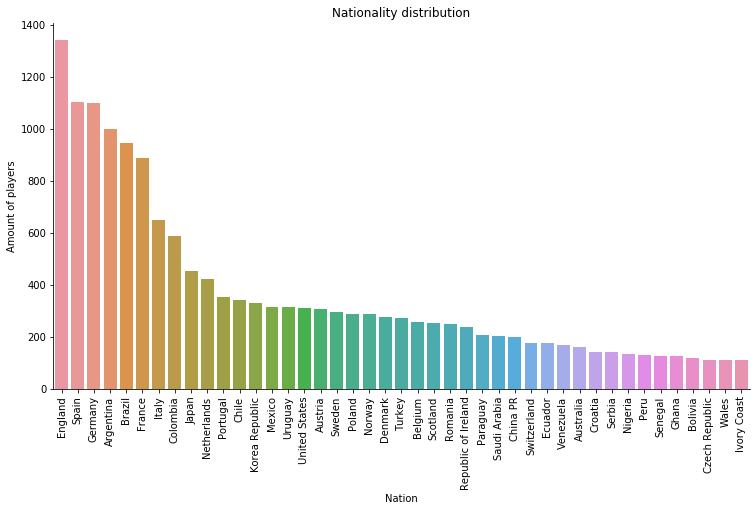

In [15]:
nationality_df = df.groupby('Nation')['Name'].count().reset_index()
nationality_df = nationality_df.sort_values(by='Name', ascending=False)
nationality_df = sns.catplot(kind='bar',x='Nation',y='Name',data=nationality_df[nationality_df.Name > 100])
nationality_df.fig.set_size_inches(13,6)
nationality_df.set_xticklabels(rotation=90)

plt.ylabel('Amount of players')
plt.title("Nationality distribution")

plt.show()

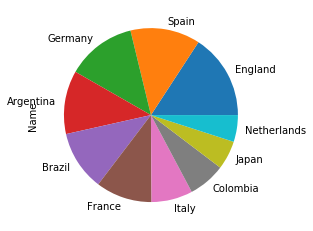

In [16]:
df.groupby("Nation").Name.count().sort_values(ascending=False).head(10).plot(kind="pie");

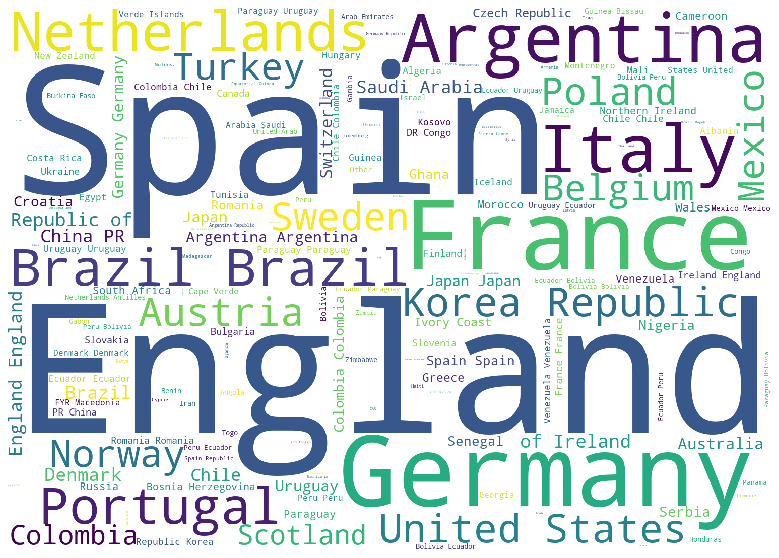

In [17]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1520,
                          height=1080
                         ).generate(" ".join(df.Nation))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('nationality.png')
plt.show()

In [18]:
def country(x):
    return df[df['Nation'] == x][['Name','Position','Club','Age','Rating','Potential']]
 
country('Israel')

Name Position                      Club  Age  Rating  \
358          Eran Zahavi       ST              Guangzhou RF   31      81   
469         Munas Dabbur       ST       TSG 1899 Hoffenheim   26      80   
2286       Lior Refaelov      CAM                   Antwerp   32      74   
2553            Dia Saba      CAM              Guangzhou RF   25      74   
3526       Shon Weissman       ST            Wolfsberger AC   22      72   
4228   Hatem Abd Elhamed       RB                    Celtic   27      72   
4345        Tal Ben Haim       LM              Sparta Praha   29      71   
4346          Nir Bitton      CDM                    Celtic   26      71   
4731         Beram Kayal       CM  Brighton and Hove Albion   30      71   
4807       Manor Solomon       RM          Shakhtar Donetsk   19      71   
5744       Taleb Tawatha       LB               Free player   26      70   
6119            Eli Dasa       RB                   Vitesse   25      70   
6284          Gadi Kinda       CM               Sporting KC   24      69   
6567       Ofir Marciano       GK                 Hibernian   28      69   
7423         Tomer Hemed       ST         Charlton Athletic   31      68   
7453        Ariel Harush       GK          Sparta Rotterdam   30      68   
7820       Alon Turgeman       ST              Wisła Kraków   27      68   
9493         Eden Shamir       CM            Standard Liège   23      67   
13478     Shay Ben David       LB                   Trapani   21      64   
14195        Gai Assulin       LM          Politehnica Iași   27      63   
14748   Samuel Scheimann       LB               Free player   30      63   
15163       Ilay Elmkies       CM       TSG 1899 Hoffenheim   18      62   

       Potential  
358           81  
469           80  
2286          74  
2553          75  
3526          76  
4228          72  
4345          71  
4346          71  
4731          71  
4807          86  
5744          70  
6119          71  
6284          72  
6567          69  
7423          68  
7453          68  
7820          68  
9493          72  
13478         71  
14195         63  
14748         63  
15163         78

In [19]:
countries=df.Nation.value_counts()
f= go.Figure(data=go.Choropleth(
    locations=countries.index,
    z =countries, 
    locationmode = 'country names', 
    colorscale =px.colors.sequential.Plasma,
    colorbar_title = "Number of players",
))

f.update_layout(
    title_text = 'Number of players from each country',
)
iplot(f)

In [20]:
#Prepare Data Frame
d_frame = df.iloc[:100,:]
donut= d_frame.Nation.value_counts()
labels = d_frame.Nation.value_counts().index #Country names of the top 100 players

#Creat Figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "National Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Nationality rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

# EDA OF Physical 

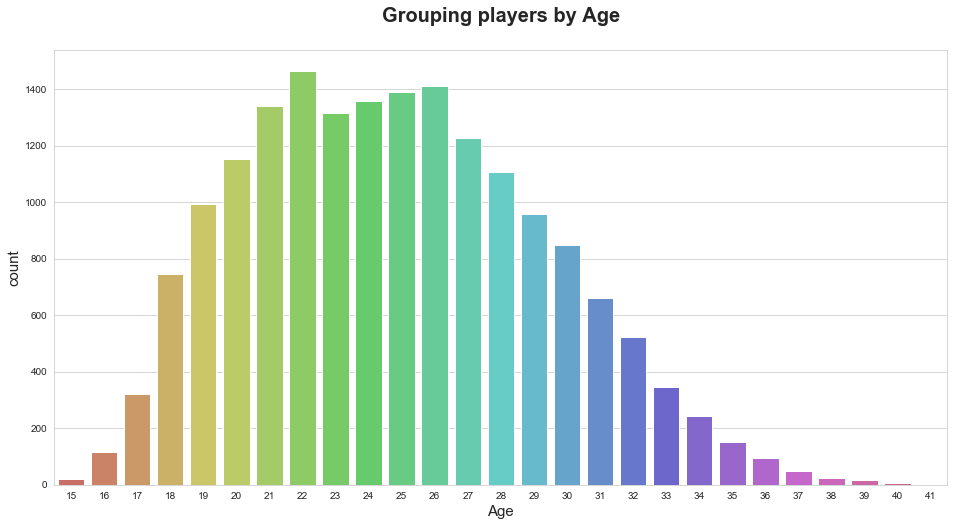

In [21]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=df, palette="hls");
plt.show()

In [22]:
oldest = df.sort_values('Age', ascending = False)[['Name','Position','Club', 'Nation', 'Age']]
oldest.set_index('Name', inplace=True)
print("The oldest players in the game: ")
oldest.head(5)

The oldest players in the game: 


Position             Club        Nation  Age
Name                                                               
Hussain Omar Sulaimani       LB          Al Ahli  Saudi Arabia   41
Leao Butron                  GK     Alianza Lima          Peru   41
Cristian Munoz               GK      Free player     Argentina   41
Frode Kippe                  CB      Free player        Norway   40
Gianluigi Buffon             GK  Piemonte Calcio         Italy   40

In [23]:
Youngest= df.sort_values('Age', ascending = True)[['Name','Position','Club', 'Nation', 'Age']]
Youngest.set_index('Name', inplace=True)
print("The youngest players: ")
Youngest.head(5)

The youngest players: 


Position                   Club         Nation  Age
Name                                                                
Ansu Fati              LW           FC Barcelona          Spain   15
Giovanni Reyna         LM      Borussia Dortmund  United States   15
Stefan Baiaram         LW  Universitatea Craiova        Romania   15
Fabricio Diaz         CDM              Liverpool        Uruguay   15
Karamoko Dembele       RW                 Celtic        England   15

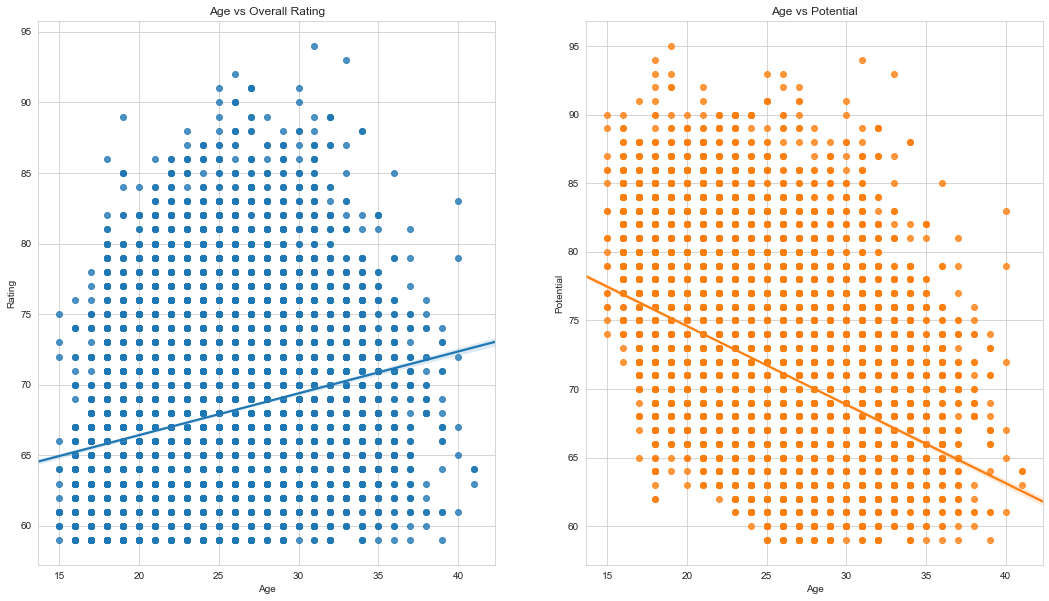

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(18,10))
sns.regplot(x=df['Age'], y=df['Rating'], ax=ax[0])
sns.regplot(x=df['Age'], y=df['Potential'], ax=ax[1])
ax[0].set_title('Age vs Overall Rating')
ax[1].set_title('Age vs Potential')
plt.show()

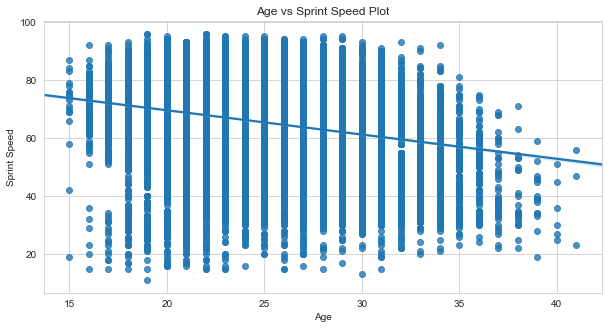

In [25]:
plt.figure(1,figsize=(10,5))
sns.regplot(df['Age'],df['Sprint Speed'])
plt.title('Age vs Sprint Speed Plot')
plt.show()

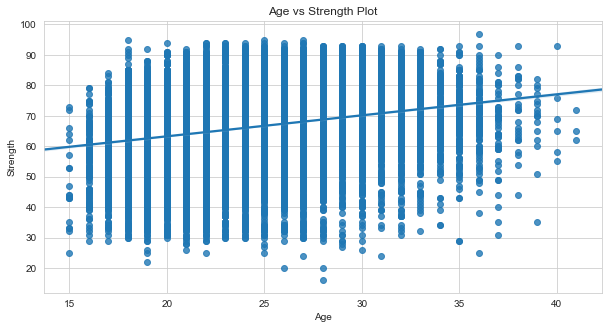

In [26]:
plt.figure(1,figsize=(10,5))
sns.regplot(df['Age'],df['Strength'])
plt.title('Age vs Strength Plot')
plt.show()

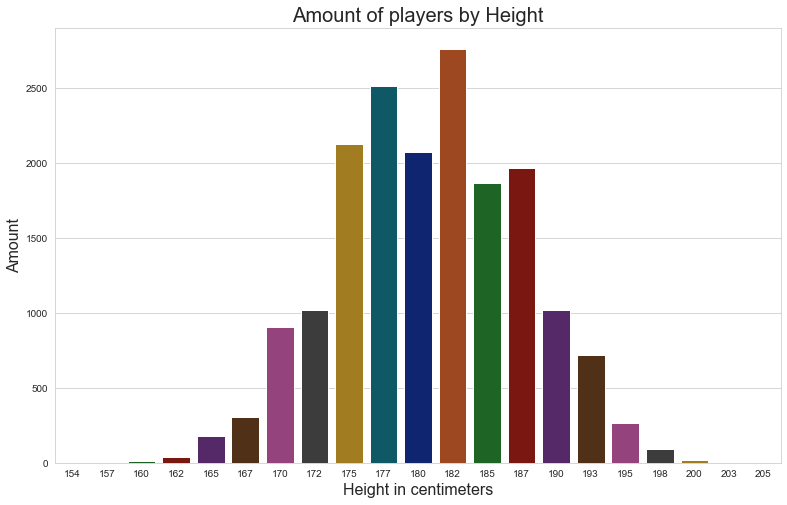

In [27]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'dark')
ax.set_title(label = 'Amount of players by Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in centimeters', fontsize = 16)
ax.set_ylabel(ylabel = 'Amount', fontsize = 16)
plt.show()

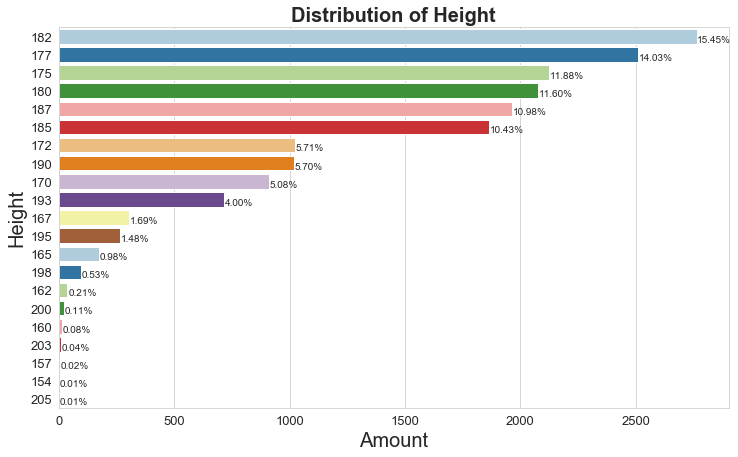

In [28]:
order = df['Height'].value_counts(ascending=False).index
plt.figure(figsize=(12,7))

ax = sns.countplot(y="Height", data=df, order=order, palette='Paired') 
ax.set_xlabel('Amount',fontsize=20)
ax.set_ylabel('Height', fontsize=20)
ax.set_title('Distribution of Height',fontsize=20, weight='bold')


total = len(df['Height'])
for p in ax.patches:
        percentage ='{:.2f}%'.format(100 * p.get_width()/total)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+3
        y=p.get_y()+height-0.1
        ax.annotate(percentage,(x,y))
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

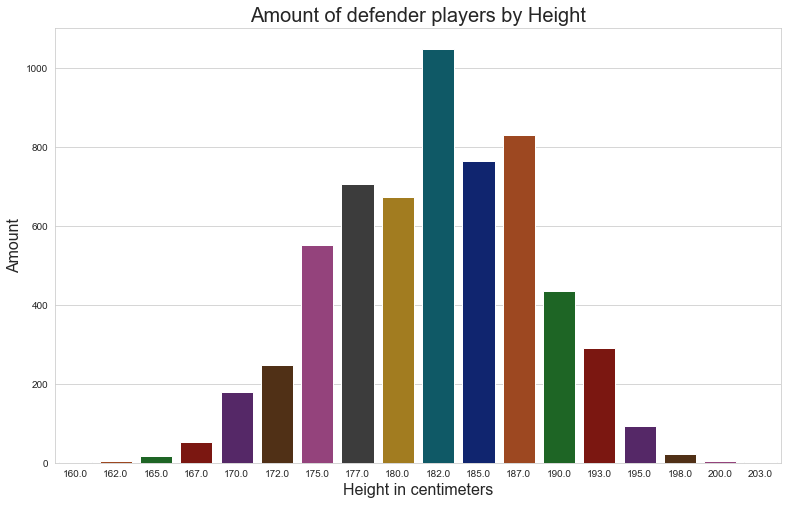

In [29]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df_of_def, palette = 'dark')
ax.set_title(label = 'Amount of defender players by Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in centimeters', fontsize = 16)
ax.set_ylabel(ylabel = 'Amount', fontsize = 16)
plt.show()

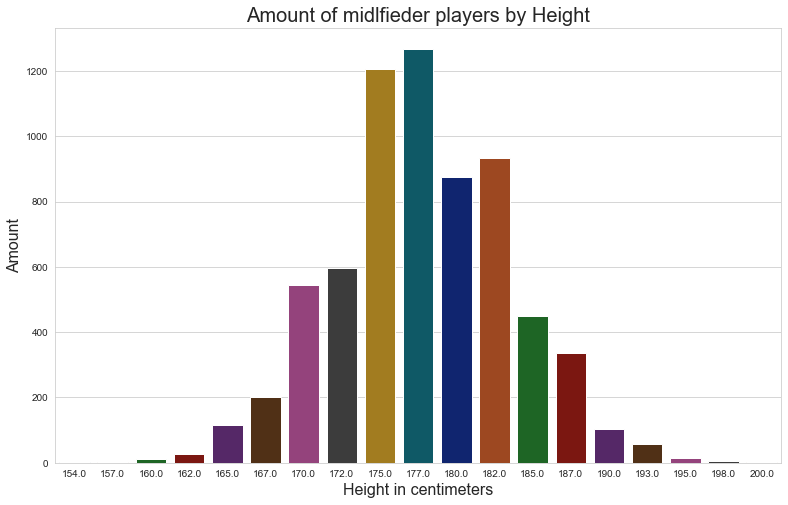

In [30]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df_of_mid, palette = 'dark')
ax.set_title(label = 'Amount of midlfieder players by Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in centimeters', fontsize = 16)
ax.set_ylabel(ylabel = 'Amount', fontsize = 16)
plt.show()

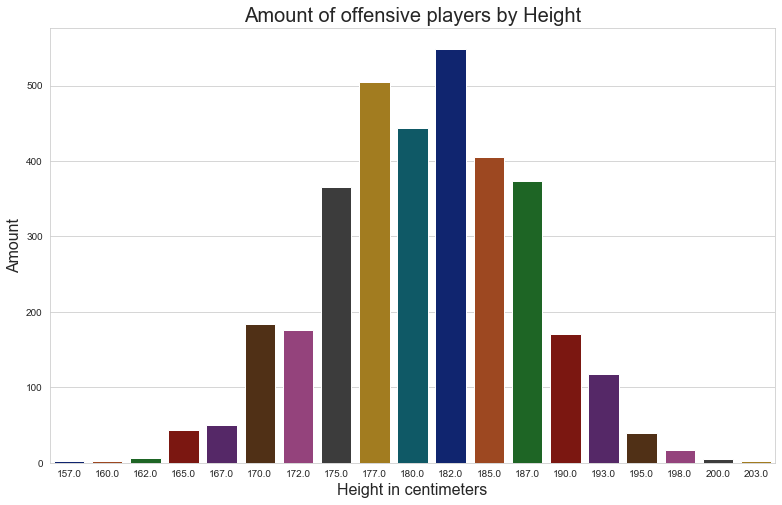

In [31]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df_of_att, palette = 'dark')
ax.set_title(label = 'Amount of offensive players by Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in centimeters', fontsize = 16)
ax.set_ylabel(ylabel = 'Amount', fontsize = 16)
plt.show()

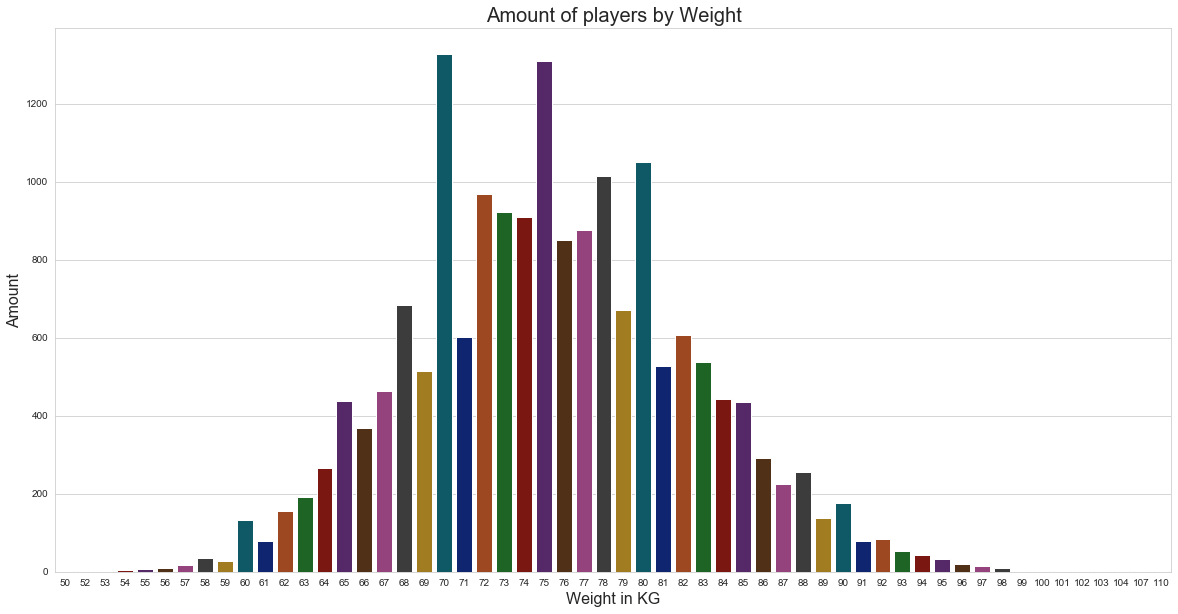

In [32]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = 'Weight', data = df, palette = 'dark')
ax.set_title(label = 'Amount of players by Weight', fontsize = 20)
ax.set_xlabel(xlabel = 'Weight in KG', fontsize = 16)
ax.set_ylabel(ylabel = 'Amount', fontsize = 16)
plt.show()

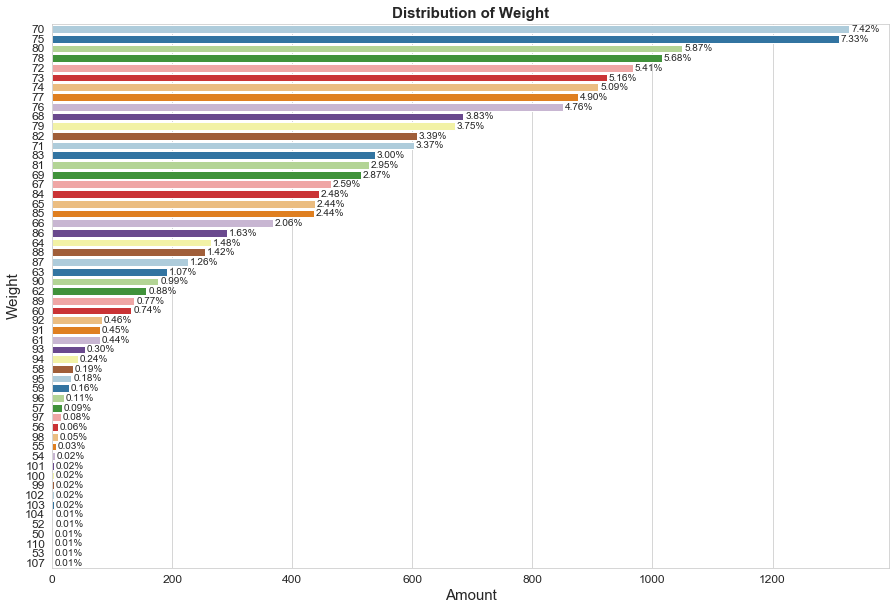

In [33]:
order =df['Weight'].value_counts(ascending=False).index
plt.figure(figsize=(15,10))

ax = sns.countplot(y="Weight", data=df, order=order, palette='Paired') 
ax.set_xlabel('Amount',fontsize=15)
ax.set_ylabel('Weight', fontsize=15)
ax.set_title('Distribution of Weight',fontsize=15, weight='bold')


total = len(df['Weight'])
for p in ax.patches:
        percentage ='{:.2f}%'.format(100 * p.get_width()/total)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+3
        y=p.get_y()+height-0.1
        ax.annotate(percentage,(x,y))
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.show()

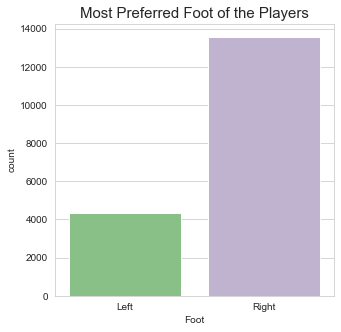

In [34]:
fig = plt.figure(figsize=(5,5))
sns.countplot(df['Foot'], palette = 'Accent')
plt.title('Most Preferred Foot of the Players', fontsize = 15)
plt.show()

In [35]:
df[df['Foot'] == 'Right'][['Name','Rating']].head(10)

Name  Rating
1       Cristiano Ronaldo      93
2                  Neymar      92
3         Virgil van Dijk      91
4               Jan Oblak      91
5         Kevin De Bruyne      91
6      Robert Lewandowski      91
7             Eden Hazard      91
8                 Alisson      90
10             Sadio Mane      90
11  Marc-Andre ter Stegen      90

In [36]:
df[df['Foot'] == 'Left'][['Name','Rating']].head(10)

Name  Rating
0        Lionel Messi      94
9       Mohamed Salah      90
16  Antoine Griezmann      89
22            Ederson      88
28   Thibaut Courtois      88
34  Giorgio Chiellini      88
35     Bernardo Silva      87
37    Aymeric Laporte      87
38       Paulo Dybala      87
48     Angel Di Maria      87

# EDA OF Top players and teams

In [37]:
df_group1 = df[["Club","Rating"]].groupby(["Club"])["Rating"].mean().reset_index().sort_values("Rating", ascending=False)
df_group1.head(10)

Club     Rating
464      Piemonte Calcio  82.916667
86        Bayern München  81.500000
414               Napoli  79.740741
498          Real Madrid  79.606061
452  Paris Saint-Germain  79.466667
385      Manchester City  78.827586
326                Inter  78.678571
141              Chelsea  78.444444
218         FC Barcelona  78.090909
85   Bayer 04 Leverkusen  77.916667

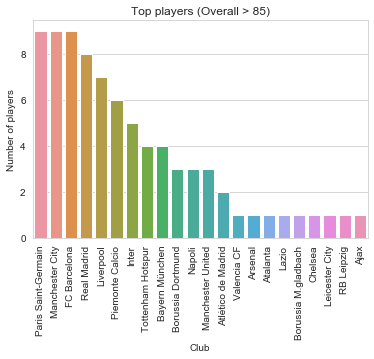

In [38]:
cutoff = 85
players = df[df['Rating']>cutoff]
grouped_players = df[df['Rating']>cutoff].groupby('Club')
number_of_players = grouped_players.count()['Name'].sort_values(ascending = False)

ax = sns.countplot(x = 'Club', data = players, order = number_of_players.index)

ax.set_xticklabels(labels = number_of_players.index, rotation='vertical')
ax.set_ylabel('Number of players')
ax.set_xlabel('Club')
ax.set_title('Top players (Overall > %.i)' %cutoff)
plt.show()

In [39]:
fifa_copy = df.copy()
fifa_copy['Difference of Points'] = fifa_copy['Potential']-fifa_copy['Rating']
fifa_copy.sort_values(by='Difference of Points', ascending = False).head(10)[['Name','Club','Age','Rating','Potential']]

Name               Club  Age  Rating  Potential
16896  Taylor Harwood-Bellis    Manchester City   16      60         83
14106      Leonidas Stergiou      FC St. Gallen   16      63         86
16791          Armando Broja            Chelsea   16      61         84
17788  Malachi Fagan-Walcott  Tottenham Hotspur   16      59         82
16679        Lucas Chevalier         LOSC Lille   16      61         84
13411         Harvey Elliott          Liverpool   15      64         87
17864        Julian von Moos        Free player   17      59         82
17174          Luke Matheson           Rochdale   15      60         83
14134            Enzo Millot        Free player   16      63         86
15156            Tommy Doyle    Manchester City   16      62         85

In [40]:
d_frame = df.iloc[:100,:]
donut= d_frame.Position.value_counts()
labels = d_frame.Position.value_counts().index


fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Position",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Position rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [41]:

donut= d_frame.Club.value_counts()
labels = d_frame.Club.value_counts().index


fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Club rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

# ML FIFA

In [42]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
train, test = train_test_split(df, test_size=0.20, random_state=99)

xtrain = train[['Value']]
ytrain = train[['Rating']]

xtest = test[['Value']]
ytest = test[['Rating']]

In [44]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = regr.predict(xtest)

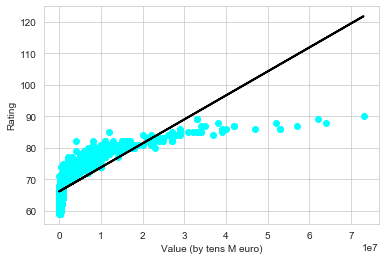

In [46]:
plt.scatter(xtest, ytest,  color='aqua')
plt.plot(xtest, y_pred, color='black', linewidth=2)
plt.xlabel("Value (by tens M euro)")
plt.ylabel("Rating")
plt.show()

In [47]:
print('The amount of players with a value lower that €30M: ', df[df.Value <= 30000000].Value.count() / df.Value.count() * 100, '%')

The amount of players with a value lower that €30M:  99.3908913104219 %


In [48]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
 
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_pred))

Mean squared error: 14.52
Variance score: 0.52


In [52]:
svr_rbf = SVR(kernel='rbf', gamma=10, C=100, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

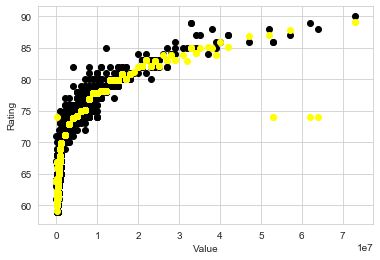

In [53]:
y_rbf = svr_rbf.predict(xtest)
plt.scatter(xtest, ytest,  color='black')
plt.scatter(xtest, y_rbf,  color='yellow')
plt.xlabel("Value")
plt.ylabel("Rating")
plt.show()

In [54]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_rbf))
 
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_rbf))

Mean squared error: 3.43
Variance score: 0.89
